### RecSys Challenge 2015
#### http://2015.recsyschallenge.com/
#### In which we pedict the buying patterns

### Learn from others
1. twitter @ACMRecSys
2. iPython notebook by @jbochi http://nbviewer.ipython.org/github/jbochi/recsyschallenge2015/blob/master/visualization.ipynb
3. blogs by @totopampin http://aloneindecember.com/words/recsys-challenge-part-iii/


In [108]:
import datetime
from pytz import timezone
print "Last run @%s" % (datetime.datetime.now(timezone('US/Pacific')))

Last run @2016-08-11 13:24:35.526930-07:00


In [109]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/ksankar/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [110]:
import pandas as pd
print 'pandas: ',pd.__version__
import ggplot

pandas:  0.18.1


In [111]:
buys = pd.read_csv("../yoochoose-dataFull/yoochoose-buys.dat", 
                   names=["session", "timestamp", "item", "price", "qty"], 
                   parse_dates=["timestamp"])

In [112]:
def read_clicks(filename):
    return pd.read_csv(filename, 
                     names=["session", "timestamp", "item", "category"], 
                     parse_dates=["timestamp"],
                     converters={"category": lambda c: -1 if c == "S" else c})

In [113]:
%%time
clicks = read_clicks("../yoochoose-dataFull/yoochoose-clicks.dat")
test = read_clicks("../yoochoose-dataFull/yoochoose-test.dat")

CPU times: user 2min 31s, sys: 11.6 s, total: 2min 42s
Wall time: 2min 49s


In [114]:
%lsmagic
# cell magic starts with %% and line magic starts with %

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [115]:
clicks.count()

session      33003944
timestamp    33003944
item         33003944
category     33003944
dtype: int64

In [116]:
clicks.head()

,session,timestamp,item,category
0,1,2014-04-07 10:51:09.277,214536502,0
1,1,2014-04-07 10:54:09.868,214536500,0
2,1,2014-04-07 10:54:46.998,214536506,0
3,1,2014-04-07 10:57:00.306,214577561,0
4,2,2014-04-07 13:56:37.614,214662742,0


#### 1. Session ID = ID of the session. In one session there are one or many clicks. Could be represented as an integer number.
#### 2. Timestamp = Time when the click occurred. Format of YYYY-MM-DDThh:mm:ss.SSSZ
#### 3. Item ID = Unique identifier of the item that has been clicked. Could be represented as an integer number.
#### 4. Category = Context of the click.
#####      - "S" indicates a special offer,
#####      - "0" indicates  a missing value,
#####      - A number between 1 to 12 indicates a real category identifier
#####      - Any other number indicates a brand. E.g. if an item has been clicked in the context of a promotion or special offer then the value will be "S", if the context was a brand i.e BOSCH,then the value will be an 8-10 digits number. If the item has been clicked under regular category, i.e. sport, then the value will be a number between 1 to 12. 


In [117]:
buys.count()

session      1150753
timestamp    1150753
item         1150753
price        1150753
qty          1150753
dtype: int64

In [118]:
buys.head()

,session,timestamp,item,price,qty
0,420374,2014-04-06 18:44:58.314,214537888,12462,1
1,420374,2014-04-06 18:44:58.325,214537850,10471,1
2,281626,2014-04-06 09:40:13.032,214535653,1883,1
3,420368,2014-04-04 06:13:28.848,214530572,6073,1
4,420368,2014-04-04 06:13:28.858,214835025,2617,1


#### 1. Session ID - Id of the session. In one session there are one or many buying events. Could be represented as an integer number.
#### 2. Timestamp - Time when the buy occurred. Format of YYYY-MM-DDThh:mm:ss.SSSZ
#### 3. Item ID - the unique identifier of item that has been bought. Could be represented as an integer number.
#### 4. Price - the price of the item. Could be represented as an integer number.
#### 5. Quantity - the quantity in this buying.  Could be represented as an integer number.```

In [119]:
test.count()

session      8251791
timestamp    8251791
item         8251791
category     8251791
dtype: int64

##### Test same as Click ie Session ID,Time Stamp,Item Id, Click Context

## Challenge as part of the RecSys Conference
#### The task is to predict for each session in the test file, whether there is going to be a buying event in this session, and if there is, what are the items that will be bought. _No need to predict quantities._
#### The solution file, that has to be submitted, comprises records that have exactly two fields:
#### solution.dat
#### 1. Session ID
#### 2. Comma separated list of Item IDs that have been bought in this session



2263615;214748295
 
2541095;214748291,214748300,214831965,214831948


In [120]:
# Plan & Ideas - Stare at data/read Blogs/Think/Extrapolate experience
#
# Assumptions
#   Assume Session ID are independnt ie not a user id
#   Session ID is relevant, but needs feature engineering
#   Are Items independent of each other (ie i.i.d)
#     Is there a relationship between clicks of multiple items and a buy ?
# To Try
#   Do all sessions in buy have respective clicks ? <Yes>
#   Clicked - Bought ratio by Category, by Item
#   Category - Bought ratio by Category, by Item
#   Items not in Clicked but in Test ? What would we do ? category base default ? Time based default ? Or ensamble ?
#   Time - Ignored here
#     Time dimension (HW) - which category, item has the best chance of buying based on time of click
#     Time Period in Daypart ? Hour granularity ? 30 min granularity ?
#     Browse time of an item vs Buy
#     Browse only items - never bought
#     Browse Time vs buy conversion ratio
#     Number of times browser vs buy
#     Session length
#     Session Clicks
#     Buy efficiency
#     Run STL - weekly trends - What is the seasonality ? Hour of week ?
#     Run ARIMA
#     Aggregate Day of the week - Buys vs Clicks, Histogram 
#     Aggregate by DayPart of week 24 X 7 = 168 - Buy vs. Click
#
#     Would naive Bayes work ?
#   This is a Classicication Problem. But what are the features ?
# Inferences
# 
# 53 % Buys have no qty !
#
#


### Step 1 - Sanity Check : an overview of the dataset, look for anomalys and incongruencies
Ref: iPython notebook by @jbochi

#### 1.1 Verify Date Range

In [121]:
print "Clicks : ",clicks["timestamp"].min(), clicks["timestamp"].max()
print "  Test : ",test["timestamp"].min(), test["timestamp"].max()
print "  Buys : ", buys["timestamp"].min(), buys["timestamp"].max()

Clicks :  2014-04-01 03:00:00.124000 2014-09-30 02:59:59.430000
  Test :  2014-04-01 03:00:08.250000 2014-09-30 02:59:23.866000
  Buys :  2014-04-01 03:05:31.743000 2014-09-30 02:35:12.859000


#### 1.2 Stats

In [122]:
clicks.dtypes

session               int64
timestamp    datetime64[ns]
item                  int64
category             object
dtype: object

In [123]:
buys.dtypes

session               int64
timestamp    datetime64[ns]
item                  int64
price                 int64
qty                   int64
dtype: object

In [124]:
%%time
print "Clicks : ",clicks.count()
print "Buys : ", buys.count() 

Clicks :  session      33003944
timestamp    33003944
item         33003944
category     33003944
dtype: int64
Buys :  session      1150753
timestamp    1150753
item         1150753
price        1150753
qty          1150753
dtype: int64
CPU times: user 3.88 s, sys: 338 ms, total: 4.22 s
Wall time: 4.43 s


In [125]:
%%time
print "Unique Sessions : ","Clicks : ",clicks["session"].unique().size,
print "Buys : ",buys["session"].unique().size
print "Buy Percentage by session : %.2f%%" %(100.0 * buys["session"].unique().size/clicks["session"].unique().size)
## Notice size not size(), unique() returns a numpy array

Unique Sessions :  Clicks :  9249729 Buys :  509696
Buy Percentage by session : 5.51%
CPU times: user 1.83 s, sys: 551 ms, total: 2.38 s
Wall time: 2.58 s


In [126]:
print "Unique Items : ","Clicks : ",clicks["item"].unique().size,
print "Buys : ",buys["item"].unique().size

Unique Items :  Clicks :  52739 Buys :  19949


In [127]:
# Item Stats - Items/session
buys[["session","item"]].groupby("session").count().describe()

,item
count,509696.000000
mean,2.257724
std,1.933342
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,144.000000


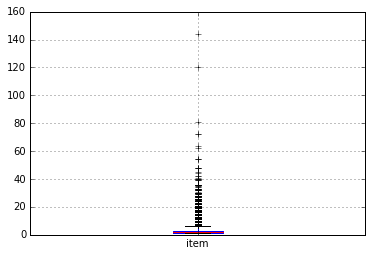

In [128]:
buys[["session","item"]].groupby("session").count().boxplot(return_type='axes')

In [129]:
# Session duration
ts_by_session = clicks[["session", "timestamp"]].groupby("session")
ts_by_session.head(5)

,session,timestamp
0,1,2014-04-07 10:51:09.277
1,1,2014-04-07 10:54:09.868
2,1,2014-04-07 10:54:46.998
3,1,2014-04-07 10:57:00.306
4,2,2014-04-07 13:56:37.614
5,2,2014-04-07 13:57:19.373
6,2,2014-04-07 13:58:37.446
7,2,2014-04-07 13:59:50.710
8,2,2014-04-07 14:00:38.247
10,3,2014-04-02 13:17:46.940


In [130]:
min_ts = ts_by_session.min() # Because ts_by_session has a hierarchical index, this gives min per group !
max_ts = ts_by_session.max()
duration = max_ts - min_ts
duration.head()

,timestamp
session,
1,00:05:51.029000
2,00:05:59.275000
3,00:12:25.378000
4,00:17:14.468000
6,00:04:06.128000


In [131]:
duration.describe()

,timestamp
count,9249729
mean,0 days 00:06:21.633378
std,0 days 00:12:36.645009
min,0 days 00:00:00
25%,0 days 00:00:32.214000
50%,0 days 00:02:07.939000
75%,0 days 00:06:24.132000
max,2 days 20:18:57.996000


### 3. Clicks n' Buys

#### Question : Do all buys have sessions in click ? 
##### Find Buys without clicks and clicks without buys - on (Session,ItemID) from buys & Clicks
##### Anti-join in Pandas ?
##### Test Result to verify correctness: 
#####      - Clicks without buys = 29,698,257 out of 33,003,944. 1,150,753 Buys
#####     - Buys without clicks - none!

In [132]:
%%time
item_buys = buys[["session", "item", "qty"]].groupby(["session", "item"]).sum()

CPU times: user 481 ms, sys: 152 ms, total: 633 ms
Wall time: 655 ms


In [133]:
item_buys.columns = ["Bought"]
item_buys.head()

Bought
session item             
11      214821371       2
12      214717867       4
21      214548744       1
        214838503       1
33      214706441       2

In [134]:
%%time
item_clicks = clicks[["session", "item", "timestamp"]].groupby(["session", "item"]).count()

CPU times: user 16.9 s, sys: 6.28 s, total: 23.1 s
Wall time: 26.3 s


In [135]:
item_clicks.columns = ["Clicked"]
item_clicks.head()

Clicked
session item              
1       214536500        1
        214536502        1
        214536506        1
        214577561        1
2       214551617        1

In [136]:
%%time
e2e_ses = pd.merge(item_clicks, item_buys, how='outer', left_index=True, right_index=True)

CPU times: user 44.9 s, sys: 10.8 s, total: 55.7 s
Wall time: 60 s


In [137]:
e2e_ses.head()

Clicked  Bought
session item                      
1       214536500        1     NaN
        214536502        1     NaN
        214536506        1     NaN
        214577561        1     NaN
2       214551617        1     NaN

In [138]:
e2e_ses.count() # number of non-null items

Clicked    26615576
Bought      1049817
dtype: int64

In [139]:
print "Buy Percentage by Item : %.2f%%" %(100.0 * e2e_ses["Bought"].count() / e2e_ses["Clicked"].count())

Buy Percentage by Item : 3.94%


In [93]:
print item_clicks.size

26615576


In [98]:
e2e_ses[pd.isnull(e2e_ses['Clicked'])]

,,Clicked,Bought
session,item,,


In [100]:
e2e_ses.describe()

/Users/ksankar/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Clicked,Bought
count,2.661558e+07,1.049817e+06
mean,1.240024e+00,7.082053e-01
std,6.613830e-01,1.398469e+00
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,NaN
50%,1.000000e+00,NaN
75%,1.000000e+00,NaN
max,2.000000e+02,1.400000e+02


In [103]:
e2e_ses.fillna(0,inplace=True).describe()

,Clicked,Bought
count,2.661558e+07,2.661558e+07
mean,1.240024e+00,2.793424e-02
std,6.613830e-01,3.100701e-01
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00
max,2.000000e+02,1.400000e+02


In [104]:
# More clicks = more buys?
e2e_ses["Clicked"].corr(e2e_ses["Bought"])

0.10215779997428077

### Step 2 - Feature Exraction

#### Add feature ClickDayPart = HourofDay & DayOfWeek
#### DayPart is a feature used widely in AdTech. Let us apply that technique here

In [141]:
buys.head()

,session,timestamp,item,price,qty
0,420374,2014-04-06 18:44:58.314,214537888,12462,1
1,420374,2014-04-06 18:44:58.325,214537850,10471,1
2,281626,2014-04-06 09:40:13.032,214535653,1883,1
3,420368,2014-04-04 06:13:28.848,214530572,6073,1
4,420368,2014-04-04 06:13:28.858,214835025,2617,1


In [142]:
clicks.head()

,session,timestamp,item,category
0,1,2014-04-07 10:51:09.277,214536502,0
1,1,2014-04-07 10:54:09.868,214536500,0
2,1,2014-04-07 10:54:46.998,214536506,0
3,1,2014-04-07 10:57:00.306,214577561,0
4,2,2014-04-07 13:56:37.614,214662742,0


In [155]:
buys["dayOfWeek"] = buys['timestamp'].dt.dayofweek # Notice that there is no function call ie dayofweek()
buys["hourOfDay"] = buys['timestamp'].dt.hour 
buys["weekOfYear"] = buys['timestamp'].dt.weekofyear 
buys.head()

,session,timestamp,item,price,qty,dayofweek,hourofday,weefofyear,dayOfWeek,hourOfDay,weekOfYear
0,420374,2014-04-06 18:44:58.314,214537888,12462,1,6,18,14,6,18,14
1,420374,2014-04-06 18:44:58.325,214537850,10471,1,6,18,14,6,18,14
2,281626,2014-04-06 09:40:13.032,214535653,1883,1,6,9,14,6,9,14
3,420368,2014-04-04 06:13:28.848,214530572,6073,1,4,6,14,4,6,14
4,420368,2014-04-04 06:13:28.858,214835025,2617,1,4,6,14,4,6,14


In [156]:
clicks["dayOfWeek"] = clicks['timestamp'].dt.dayofweek 
clicks["hourOfDay"] = clicks['timestamp'].dt.hour 
clicks["weekOfYear"] = clicks['timestamp'].dt.weekofyear 
clicks.head()

,session,timestamp,item,category,dayofweek,hourofday,weefofyear,dayOfWeek,hourOfDay,weekOfYear
0,1,2014-04-07 10:51:09.277,214536502,0,0,10,15,0,10,15
1,1,2014-04-07 10:54:09.868,214536500,0,0,10,15,0,10,15
2,1,2014-04-07 10:54:46.998,214536506,0,0,10,15,0,10,15
3,1,2014-04-07 10:57:00.306,214577561,0,0,10,15,0,10,15
4,2,2014-04-07 13:56:37.614,214662742,0,0,13,15,0,13,15


In [163]:
clicks_by_day = clicks['dayOfWeek'].groupby(clicks['dayOfWeek']).count().to_frame("Clicked")
clicks_by_day.head(10)

,Clicked
dayOfWeek,
0,6578482
1,2233498
2,4795554
3,4512049
4,3615548
5,3908733
6,7360080


In [164]:
buys_by_day = buys['dayOfWeek'].groupby(buys['dayOfWeek']).count().to_frame("Bought")
buys_by_day.head(10)

,Bought
dayOfWeek,
0,215594
1,40925
2,147451
3,146158
4,126955
5,171441
6,302229


In [176]:
e2e_by_day = pd.merge(clicks_by_day, buys_by_day, how='outer', left_index=True, right_index=True)
e2e_by_day.index = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
e2e_by_day

,Clicked,Bought
Sunday,6578482,215594
Monday,2233498,40925
Tuesday,4795554,147451
Wednesday,4512049,146158
Thursday,3615548,126955
Friday,3908733,171441
Saturday,7360080,302229


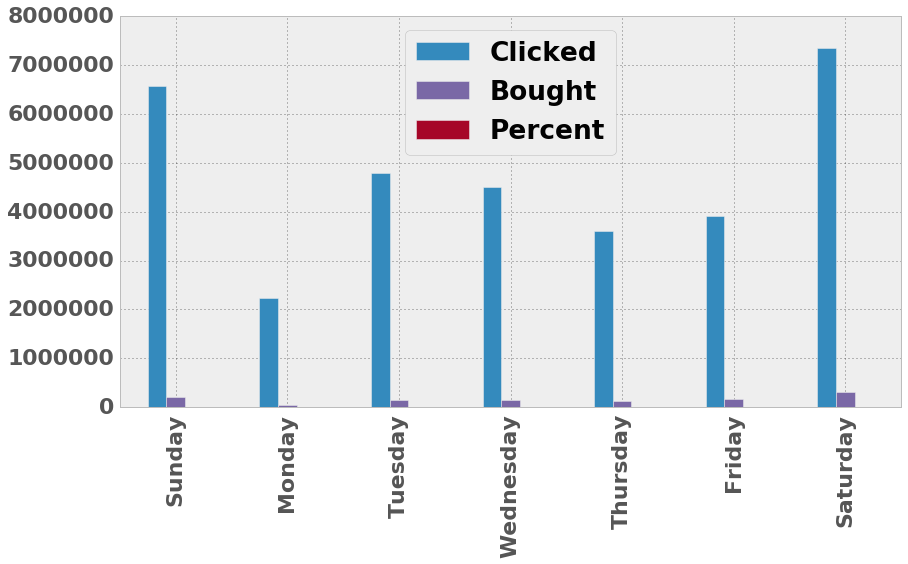

In [179]:
e2e_by_day.plot(kind="bar")

In [178]:
e2e_by_day["Percent"] = 100.0 * e2e_by_day["Bought"] / e2e_by_day["Clicked"]
e2e_by_day

,Clicked,Bought,Percent
Sunday,6578482,215594,3.277261
Monday,2233498,40925,1.832328
Tuesday,4795554,147451,3.074744
Wednesday,4512049,146158,3.239282
Thursday,3615548,126955,3.511363
Friday,3908733,171441,4.386102
Saturday,7360080,302229,4.106328


In [ ]:
# There is a difference in buys on different day of the week

### Addendum

#### Interesting Technique combining apply to groupby date

In [174]:
# some display options to make figures bigger
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 400)
pd.set_option('display.mpl_style', 'default')
rcParams['figure.figsize'] = (14, 7)
import matplotlib
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

CPU times: user 1min 48s, sys: 7.87 s, total: 1min 56s
Wall time: 2min


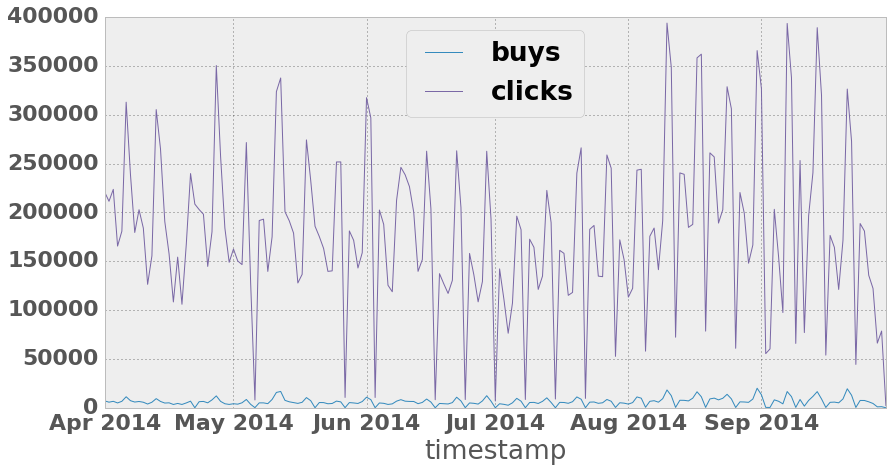

In [175]:
%%time
#Buys and clicks per day
buys_grouped_dates = buys["timestamp"].groupby(buys["timestamp"].apply(lambda x : x.date()))
buys_by_date = buys_grouped_dates.count()
buys_by_date = buys_by_date.to_frame(name="buys")

clicks_grouped_dates = clicks["timestamp"].groupby(clicks["timestamp"].apply(lambda x : x.date()))
clicks_by_date = clicks_grouped_dates.count()
clicks_by_date = clicks_by_date.to_frame(name="clicks")

buys_and_click_by_date = pd.merge(buys_by_date, clicks_by_date, how='outer', left_index=True, right_index=True)
buys_and_click_by_date.fillna(0, inplace=True)

buys_and_click_by_date.plot()

### Step 3 - ML Modelling & Prediction

In [ ]:
#Outside this session ...

### _That's All, Folks !_